<a href="https://colab.research.google.com/github/fabnancyuhp/RENDUPYTHONISFSTAT/blob/master/Ex3ReseauNeurone(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1 :

In [0]:
import pandas as pd
import numpy as np
rep = "C:/Users/kraepa19/Downloads/credit.pkl"
DATA_CREDIT = pd.read_pickle(rep)
DATA_CREDIT['A16'].loc[(DATA_CREDIT['A16']=='+')]=1
DATA_CREDIT['A16'].loc[(DATA_CREDIT['A16']=='-')]=0
DATA_CREDIT.head(2)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_l,A4_u,...,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s,A16
0,30.83,0.00,1.25,1.0,202.0,0.0,0,1,0,1,...,0,1,0,1,1,0,1,0,0,1
1,58.67,4.46,3.04,6.0,43.0,560.0,1,0,0,1,...,0,1,0,1,1,0,1,0,0,1


In [0]:

from sklearn.model_selection import train_test_split
var_feature = [o for o in DATA_CREDIT.columns if o!='A16']
X = DATA_CREDIT[var_feature]
Y = DATA_CREDIT['A16']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,\
random_state=2018)

Question 2 :

In [0]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(X_train)
X_train_scal = scale.transform(X_train)
X_test_scal = scale.transform(X_test)

from sklearn.neural_network import MLPClassifier
NN1 = MLPClassifier(hidden_layer_sizes=(10,8),activation='logistic',solver='lbfgs',random_state = 2018, max_iter=500)
NN1.fit(X_train_scal,Y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 8), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=2018, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Question 3 :

In [0]:
Y_pred = NN1.predict(X_test_scal)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,Y_pred)
accuracy

0.8536585365853658

Question 4 :

In [0]:
Y_test_score_proba=NN1.predict_proba(X_test_scal)[:,1]

import numpy as np
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_test_score_proba)

0.8050455291834601

Question 5 :

In [0]:
NN2 = MLPClassifier(hidden_layer_sizes=(10,5,8),activation='logistic',solver='lbfgs',random_state = 2018)
NN2.fit(X_train_scal,Y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 5, 8), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=2018, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Question 6 :

In [0]:
Y_pred = NN2.predict(X_test_scal)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,Y_pred)
accuracy

0.8475609756097561

Question 7 :

In [0]:
Y_test_score_proba=NN2.predict_proba(X_test_scal)[:,1]

import numpy as np
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_test_score_proba)

0.7928048962531721

Question 8 :

Le paramètre solver correspond à la fonction d'optimisation utilisée par de réseau de neurones

Question 9 :

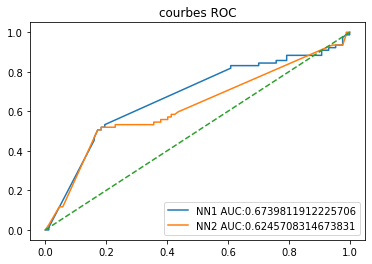

In [0]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, threshold1 = roc_curve(Y_test,NN1.predict_proba(X_test)[:,1])
fpr2, tpr2, threshold2 = roc_curve(Y_test,NN2.predict_proba(X_test)[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr1,tpr1,label="NN1 AUC:"+str(auc(fpr1,tpr1)))
plt.plot(fpr2,tpr2,label="NN2 AUC:"+str(auc(fpr2,tpr2)))
plt.plot([0,1],[0,1],linestyle='--')
plt.title('courbes ROC')
plt.legend(loc=4)
plt.show()